# Generator Tutorial

This tutorial is to help you understand how the basic objects that generate data to be used for gravitational waves.

#### Packages you will need
Until a more stable version is available for installation I suggest to source the package directly from my directory in 
LHO cluster `"/home/vasileios.skliris/mly/"` To do that in python you just append this path to your default paths

In [1]:
# Path sourcing and access to the ligo real data
import sys
import os
sys.path.append("/home/vasileios.skliris/mly/")
os.environ["LIGO_DATAFIND_SERVER"] = 'ldr.ldas.cit:80'
%matplotlib inline

The **mly** package provides two main python objects to manipulate and generate data: `DataPod` and `DataSet`
Furthermore we will also talk here about the `PlugIn` objects.

In [2]:
from mly.datatools import DataPod, DataSet
from mly.validators import *

from mly.plugins import *

# Python packages that we will need
import numpy as np
import matplotlib.pyplot as plt

---
---
## DataPod

DataPod is an object to consentrate all the information of a data.
instance. The reason for their creation is to encapsulate all the usefull
attributes a machine learning algorithm will need. Getting them together 
into DataSet objects creates a powerfull tool to simplify machine learning
training and testing procedures for any kind of network.
    
**Attributes**

---

- _strain_ :  `numpy.ndarray / gwpy.timeseries.TimeSeries / list`

    The main data of the pod. It can be a timeseries or a picture or 
    anything with fixed dimentions. Finally it checks the input for nans
    and infs and returns errors if the data have size or value problems.

- _fs_ : `int`

    This is the sample frequency of the data. It is used to determine 
    the duration of the of the strain input. If the strain is not a
    time series it is not used anywhere.
            
- _labels_ : `dict` (optional)
    It determines the main labels of the DataPod. These labels will be
    used by algorithms for classification. If empty, a label called 
    "UNDEFINED" is given. Suggested keys for labels are the following:
    
  ```{ 'type' : ('noise' , 'cbc' , 'signal' , 'burst' , 'glitch', ...),
    'snr'  : ( any int or float number bigger than zero),
    'delta': ( Declination for sky localisation, float [-pi/2,pi/2])
    'ra'   : ( Right ascention for sky licalisation float [0,2pi) )}
    
   ```

    For all labels, keys and values are not case sensitive.
            
- _detectors_ : `list` (optional)

    If the strain belongs to a specific detector it is suggested to 
    state which detector is it. If it not specified the number of 
    detectors is assumed to be the smallest strain dimention and a
    list of 'U' is set with length equal to the detector number that 
    was assumed. The first dimention of every strain must be the 
    number of detectors involved. If it's not a check takes place to
    see if the dimention is somewhere else. If it is we the strain is
    transposed.
              
- _gps_ : `int / float` (optional)

    The gps time of each of the detector strains. If not defined a
    list of zeros with length equal to detectors is defined. It has to
    be a possitive number.
    
- _duration_ : `int / float` (optional)

    The duration in seconds of the strain. If the strain is more than
    2D in shape the duration has to be difined independently.
              
- _metadata_ : `dict` (optional)
    
    A dictionary with additional infromation about the pod.
        
- _plugins_ : `PlugIn / str` (optional)

    Except strain data it might be wanted to have other related data. 
    You can define PlugIn objects and pass them into the Dataset. Some
    of those PlugIns like 'correlation', are already defined and you can 
    call them as by passing their names as strings.
---

**Examples**

_Basic DataPod_: To create a Datapod instance you just need some time-series data and their sample frequency. Detector definition is optional but will be very important in the real case. Labels are also optional but we will use them nevertheless. The thought of creating the labels attribute is based on the use of the generated data to train a classification machine learning algorithm.

So we define two time-series with random numbers and a sample frequency to built a DataPod.

In [3]:
timeseries1 = np.random.randn(1*1024)
timeseries2 = np.random.randn(1*1024)
sample_frequency=1024

In [4]:
pod = DataPod( strain = [ timeseries1 , timeseries2 ]
              , labels = {'type':'noise' }
              , fs = sample_frequency
              , detectors=['H','L'])

- To visualize what data the DataPod has we can use the `.plot()` method

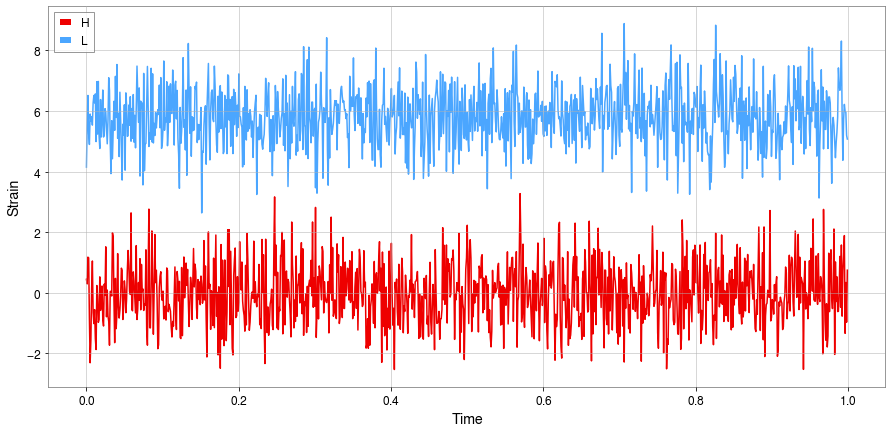

In [5]:
pod.plot()

- By printing the pod you get a small description of the main values in the dataPod

In [6]:
print(pod)

(2, 1024)[ 0.44193 0.29167 ... -0.9716 0.74545 ] H 
         [ -1.6593 -0.3288 ... -0.6105 -0.7339 ] L  LABELS: noise  



- Additionally we can retrieve any information we want about this DataPod calling the relative attributes:

In [7]:
print(pod.detectors)
print(pod.labels)
print(pod.duration)
print(pod.gps)
print(pod.metadata)

['H', 'L']
{'type': 'noise'}
1.0
[0, 0]
None


- It is possible to change those attributes of course but make sure you don't change things in a way that could confuse the code. For example you can rename the detectors but not put an additional one. An attribute you might want to change is the metadata. This might help find information of the DataPod without. For example:


In [8]:
pod.metadata={'info':"This is a datapod generated for a tutorial"}
print(pod.metadata)

{'info': 'This is a datapod generated for a tutorial'}


- Another example would be to add an extra label:

In [9]:
pod.labels['SNR']=0
print(pod.labels)

{'type': 'noise', 'SNR': 0}


---
**Notes**

The DataPod is the building block of the DataSet class we will see below. The core data called strain are not the only data you can have in the DataPod. To add more data we will define an object called PlugIn in the end of this tutorial.



---
---

# DataSet

DataSet is an object that helps manipulate groups of DataPods as a whole.
The main attribute is a list of the DataPods. All methods are providing ways
to manipulate the data and export them to desired shapes. Finally it provides
a DataSet generator.

---
**Attributes**

- _dataPods_: `list of DataPod objects` (optional)

  List of the DataPod objects to be part of this DataSet instance. All DataPods
  are checked for inconsistences such as different shapes, different number of
  detectors and different sample frequencies.

- _name_: `str` (optional)
   
  The name of the DataSet

---

**Examples**

- A simple way to create a DataSet object is to create a list of dataPods. The following script will create a list and it will append 10 different dataPods in this list. Finally it will wrap this list with in a DataSet object.

In [10]:
Set=[]
set_size = 10

for i in range(set_size): 
    pod = DataPod(np.random.randn(3,1024),fs=1024,detectors='HLV',labels={"type":'noise'})
    Set.append(pod)
    
mydataset=DataSet(Set, name = 'Dave')
print(mydataset)

10 instances with shape (3, 1024)

(3, 1024)[ 1.20115 1.13750 ... -0.5276 -0.4334 ] H 
         [ 0.87118 -2.2978 ... 0.78471 -0.1367 ] L 
         [ -0.2538 -1.2242 ... -0.5622 -0.1083 ] V  LABELS: noise  

(3, 1024)[ -0.5878 -0.3424 ... -0.7425 0.79577 ] H 
         [ 0.31139 0.20788 ... -0.7074 2.81385 ] L 
         [ 0.60724 0.49186 ... 0.97755 -0.2868 ] V  LABELS: noise  

         .         .         .         .         .         .         .
         .         .         .         .         .         .         .
         .         .         .         .         .         .         .

(3, 1024)[ -2.0033 -0.5438 ... -0.0809 0.45652 ] H 
         [ 0.74622 0.01449 ... -0.1260 -1.5001 ] L 
         [ 2.22594 0.41668 ... -1.7502 0.71405 ] V  LABELS: noise  

(3, 1024)[ 0.43530 -0.8038 ... 1.00892 0.42687 ] H 
         [ 1.04233 -0.8778 ... -1.2198 0.75747 ] L 
         [ -2.0417 0.19002 ... -0.4354 0.70310 ] V  LABELS: noise  




You see that if we print the DataSet object we will again get a small summary of informations. Additionally some values are shown to help identify issues.

- DataSet has also saving and loading functions, to save the DataSet and load an already saved one.

In [11]:
mydataset.save('mydataset.pkl')


In [12]:
anotherdataset=DataSet.load('mydataset.pkl')
print(anotherdataset)

10 instances with shape (3, 1024)

(3, 1024)[ 1.20115 1.13750 ... -0.5276 -0.4334 ] H 
         [ 0.87118 -2.2978 ... 0.78471 -0.1367 ] L 
         [ -0.2538 -1.2242 ... -0.5622 -0.1083 ] V  LABELS: noise  

(3, 1024)[ -0.5878 -0.3424 ... -0.7425 0.79577 ] H 
         [ 0.31139 0.20788 ... -0.7074 2.81385 ] L 
         [ 0.60724 0.49186 ... 0.97755 -0.2868 ] V  LABELS: noise  

         .         .         .         .         .         .         .
         .         .         .         .         .         .         .
         .         .         .         .         .         .         .

(3, 1024)[ -2.0033 -0.5438 ... -0.0809 0.45652 ] H 
         [ 0.74622 0.01449 ... -0.1260 -1.5001 ] L 
         [ 2.22594 0.41668 ... -1.7502 0.71405 ] V  LABELS: noise  

(3, 1024)[ 0.43530 -0.8038 ... 1.00892 0.42687 ] H 
         [ 1.04233 -0.8778 ... -1.2198 0.75747 ] L 
         [ -2.0417 0.19002 ... -0.4354 0.70310 ] V  LABELS: noise  




- A very useful method of DataSet objects is `fusion()`. This method takes as input different DataSets and merges them into one. To do that a list of DataSet or a list with paths of already saved datasets is passed as input. In the following example we generate another DataSet as before and we fuse it with the already saved one by putting them in a list.

In [13]:
Set=[]
for i in range(set_size): 
    pod = DataPod(np.random.randn(3,1024),fs=1024,detectors='HLV',labels={"type":'signal'})
    Set.append(pod)

set1=DataSet(Set)
set2=DataSet.load('mydataset.pkl')

mergedSet=DataSet.fusion([set1,set2])


Note that you can do the same thing by providing the path of the second set directly.

In [14]:
mergedSet=DataSet.fusion([set1,'mydataset.pkl'])

print(mergedSet)

20 instances with shape (3, 1024)

(3, 1024)[ -2.0033 -0.5438 ... -0.0809 0.45652 ] H 
         [ 0.74622 0.01449 ... -0.1260 -1.5001 ] L 
         [ 2.22594 0.41668 ... -1.7502 0.71405 ] V  LABELS: noise  

(3, 1024)[ -0.415 0.1572 ... -0.897 -0.192 ] H 
         [ -0.994 -1.319 ... -1.061 0.7729 ] L 
         [ -1.230 -0.261 ... -0.675 -0.486 ] V  LABELS: signal  

         .         .         .         .         .         .         .
         .         .         .         .         .         .         .
         .         .         .         .         .         .         .

(3, 1024)[ 1.5705 -0.607 ... -0.541 -0.571 ] H 
         [ 0.4810 -0.767 ... -0.821 -0.003 ] L 
         [ -0.994 -1.453 ... 0.4891 0.0040 ] V  LABELS: signal  

(3, 1024)[ 0.7540 0.0102 ... -0.976 0.5189 ] H 
         [ 1.7371 0.9653 ... -0.745 0.0095 ] L 
         [ 0.2515 0.9623 ... 0.4284 0.7177 ] V  LABELS: signal  




- The new DataSet has now 20 instances. What if we only want to have 10 samples of this fusion of sets? This method gives an additional option to provide how many from each set we want in a list.

In [15]:
mergedSet=DataSet.fusion( [set1,'mydataset.pkl']
                        , [5,5])
print(mergedSet)

10 instances with shape (3, 1024)

(3, 1024)[ 1.5705 -0.607 ... -0.541 -0.571 ] H 
         [ 0.4810 -0.767 ... -0.821 -0.003 ] L 
         [ -0.994 -1.453 ... 0.4891 0.0040 ] V  LABELS: signal  

(3, 1024)[ -0.5878 -0.3424 ... -0.7425 0.79577 ] H 
         [ 0.31139 0.20788 ... -0.7074 2.81385 ] L 
         [ 0.60724 0.49186 ... 0.97755 -0.2868 ] V  LABELS: noise  

         .         .         .         .         .         .         .
         .         .         .         .         .         .         .
         .         .         .         .         .         .         .

(3, 1024)[ 0.7540 0.0102 ... -0.976 0.5189 ] H 
         [ 1.7371 0.9653 ... -0.745 0.0095 ] L 
         [ 0.2515 0.9623 ... 0.4284 0.7177 ] V  LABELS: signal  

(3, 1024)[ -1.1098 0.82414 ... 0.47289 -0.6374 ] H 
         [ 0.21612 -0.3683 ... 0.82843 -0.3305 ] L 
         [ -0.3108 -0.2904 ... -1.0494 0.04524 ] V  LABELS: noise  




The fusion method additionally shuffles the DataPods when fusing them.

- Given that we have a DataSet made, we might want to feed it in a machine learning algorithm. Although sometimes due to different input shapes needed this might be tricky. To help with those situations we have the export methods.
  1. exportData
  2. exportLabels
 
- **exportData** : Returns the data in a numpy array format. You can select the desired shape you want for it to have. 

In [16]:
data=mydataset.exportData('strain') 

DataSet with shape (10, 3, 1024) is exported


If you want a shape (10,1024,3) instead you can give it as input. Note here that 10 is actually the size of the dataset and there are cases where the size is not known always when you export the data. For this reason you can state the size of the dataset in the desired shape with None.

In [17]:
data=mydataset.exportData('strain',shape=(None,1024,3))

DataSet with shape (10, 1024, 3) is exported


- **exportLabels**: Returns the labels in a table format, you can select which types of labels you want to export by specifing the key of that label type. The default is 'type'. In case your output is of single dimention and you want to have at least two dimentions you can set reshape to True.

In [19]:
labels=mydataset.exportLabels()
labels=mydataset.exportLabels('type')
labels=mydataset.exportLabels('type',reshape=True)

Labels ['type'] with shape (10,) are exported
Labels ['type'] with shape (10,) are exported
Labels ['type'] with shape (10, 1) are exported


---
---

# PlugIn


PlugIn is a class to encapsulate any additional data we want to
have along with the main data a DataPod has. The new data we introduce
with a PlugIn object might be just a value or something that is calcukated
from other PlugIns or strain already present in the DataPod instance. Every
PlugIn has a name and a generation function. Additionally it can have
attributes (related to the attributes use to create the plugin data) and
also a plot function that will help plot the data from the DataPod.plot(< name >).

    
**Attributes**
---------

- _name_: `str`

    The name you want to use for the data you add. This is going to be an
    attribute of the DataPod object that the plugin will be added.

- _genFunction_: `function/value`

    The fuction to use to infere the new data from other attributes in the 
    targeted DataPod. You can also just pass a value if no use of other 
    attributes is needed.

- _plotFunction_: `function` (optional)

    A function with the same attributes as genFunction that returns a
    matplotlib.pyplot plot. This will be called if you want to plot 
    the data that the plugin will have.

- _attributes_: `list/tuple of strings` (optional

    A list or tuple of the names of attributes used by the genFunction.
    These attributes must be attributes of the DataPod you plan to add 
    the plugin.

- _plotAttributes_: `list/tuple of strings`

    A list or tuple of the names of attributes used by the plotFunction.
    These attributes must be attributes of the DataPod you plan to add 
    the plugin. If not specified it is set equal to attributes.


Notes
-----

When you call plotFunction, make sure that genFunction and plotFunction
call the same attributes with the same order. 


When the PlugIn is added to a DataPod through DataPod.addPlugIn() method
it will create a new attribute for the DataPod to be called like strain 
DataPod.<name>.
"""
    
---

**Examples**

PlugIns are extra data or information that we need to make accessible in a
DataPod. They can be any value or object but the can also be generated from
the strain data themselves
    
- First we will create the simplest form of PlugIn which is just a value. Assume this value is the right ascention of the sky location of a signal.

In [20]:
ra=PlugIn('ra',5)

In [21]:
ra = PlugIn( name = 'ra'
            ,genFunction = 3.5) #in this case it is just a value

  To add this PlugIn to a pod we use the addPlugIn method. Then the pod can call the new plugin as an attribute.

In [22]:
mypod = DataPod(np.random.randn(3,1024),fs=1024,detectors='HLV')
mypod.addPlugIn(ra)
print(mypod.ra)

3.5


- A more complicated case would be to have a plugin to generate the fourier transform of the strain data. To do that we need to define a function that will do that by using attributes that exist in the DataPod. To add the new plugin we will also have to define the attributes to be used.

In [23]:
def fftGenFunction(strain):
    ffts=[]  
    for st in strain:  # Loop to all data from all detectors
        ffts.append(np.abs(np.fft.fft(st)))
    return np.array(ffts)

fft = PlugIn( name = 'fft'
            ,genFunction = fftGenFunction
            ,attributes=['strain'])

mypod.addPlugIn(fft)

print(mypod.fft)

[[16.04494657 32.49423884 40.1762391  ... 21.32848861
  40.1762391  32.49423884]
 [29.08171001 42.30756866 43.02089206 ... 33.79303433
  43.02089206 42.30756866]
 [48.50112098 21.73196854 40.76325794 ... 26.50968594
  40.76325794 21.73196854]]


Data like these might also need an nice way to be presented - their own plot function. To do that we can additionally create a plotting function to pass in the plug in. Note that the plotting fuction asks also for the detector attribute and we have to inform the plugIn definition for this.

Note that the extra input called data=None in the plot function must always be there so that the function can call the source data when it is attached to the pod. This more like a technical detail.

In [24]:
def fftPlotFunction(strain,fs,detectors,data=None):

    f,ax = plt.subplots(figsize=(15,7))
    ax.set_xlabel('Frequency')
    colors = {'H': '#ee0000','L':'#4ba6ff','V':'#9b59b6','K':'#ffb200','I':'#b0dd8b','U': 'black'}
    for det in detectors:
        f = np.fft.fftfreq(len(data[detectors.index(det)]) )   
        ax.loglog(f,data[detectors.index(det)],color= colors[det]
                   ,label = str(det))
    plt.legend()
    
    return ax

fft = PlugIn( name = 'fft'
            ,genFunction = fftGenFunction
            ,attributes=['strain']
            ,plotFunction= fftPlotFunction
            ,plotAttributes=['strain','fs','detectors'])

mypod.addPlugIn(fft) # This will replase the already added plugin

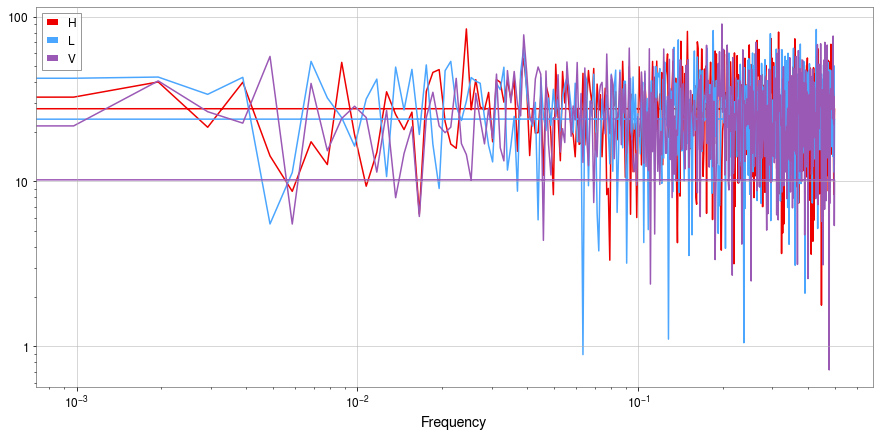

In [25]:
mypod.plot('fft')

Now that we defined the fft plugin we can add it in any pod we want. Additionally we can add it in a DataSet too.

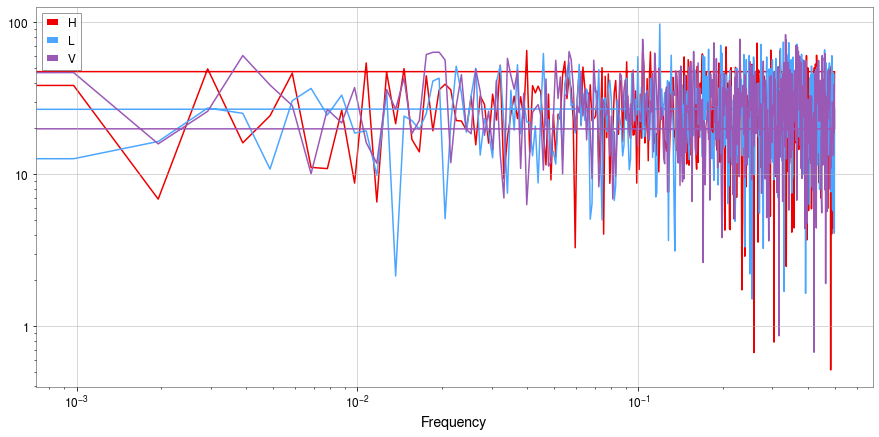

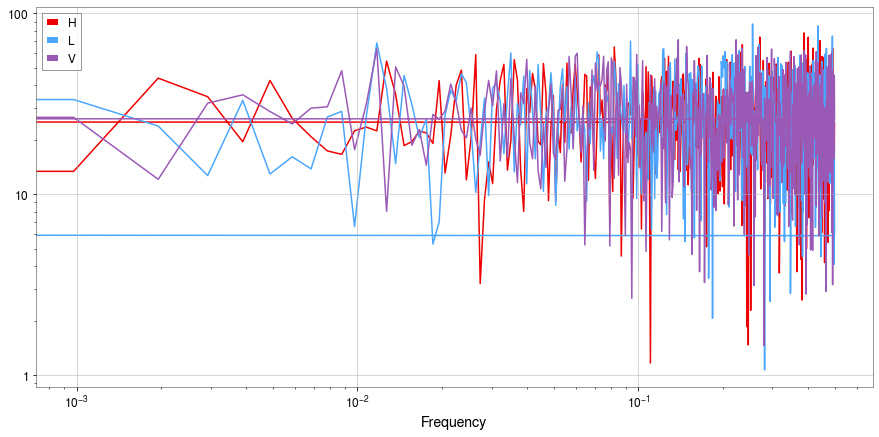

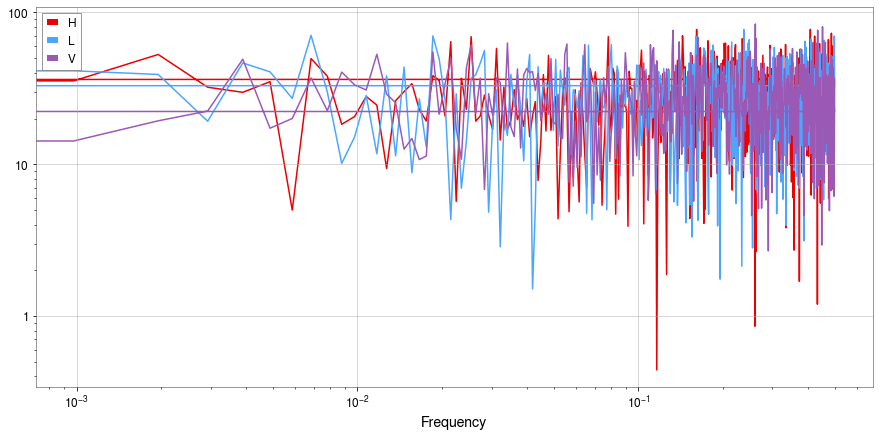

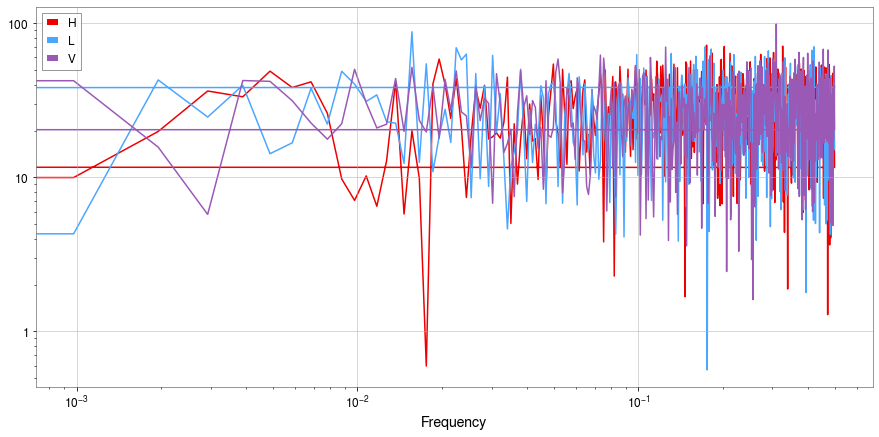

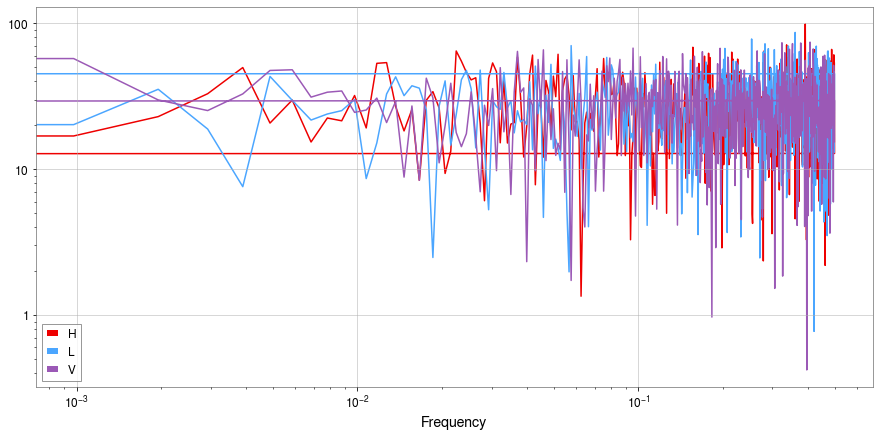

In [26]:
mydataset.addPlugIn(fft)
for pod in mydataset[:5]:
    pod.plot('fft')

## Generators
The `generator(...)` method of DataSet includes the core of all types of generation of data. This tutorial starts with the simple example of noise generation and goes up to more complicated cases of injections.
### Noise Generator

The basic parameters you need for the generator are:

- _duration_: `int/float`

    The duration of every instantiation to generate.
    
- _fs_: `int`
    
    The sample frequency
    
- _size_: `int`
    
    The number of instantiation need to generate
    
- _detectors_: `str/list of char`

    The initials of the detectors to be used for generation. No need for real data to do that.
    The options are H L V I K and U(undefined)
    
- _labels_: `dict`
    
    The labels of the data to generate.
    
- _backgroundType_ `{'optimal', 'real}`

    The use of gaussian noise or real noise. Real noise has more complicated procedure 
    and we will see it later in the tutorial.



- Simle noise generator

[]
[(3, 1024)[ 2.5558 -1.236 ... -0.566 0.5340 ] H 
         [ -0.991 -0.712 ... -1.272 -0.088 ] L 
         [ 1.1099 0.2839 ... 1.0147 0.2859 ] V  LABELS: noise  
]
[(3, 1024)[ 2.5558 -1.236 ... -0.566 0.5340 ] H 
         [ -0.991 -0.712 ... -1.272 -0.088 ] L 
         [ 1.1099 0.2839 ... 1.0147 0.2859 ] V  LABELS: noise  
, (3, 1024)[ 2.1455 1.2944 ... -0.441 0.7675 ] H 
         [ 1.0685 -0.487 ... -0.112 2.1615 ] L 
         [ 1.3403 -0.398 ... 0.6872 0.4284 ] V  LABELS: noise  
]




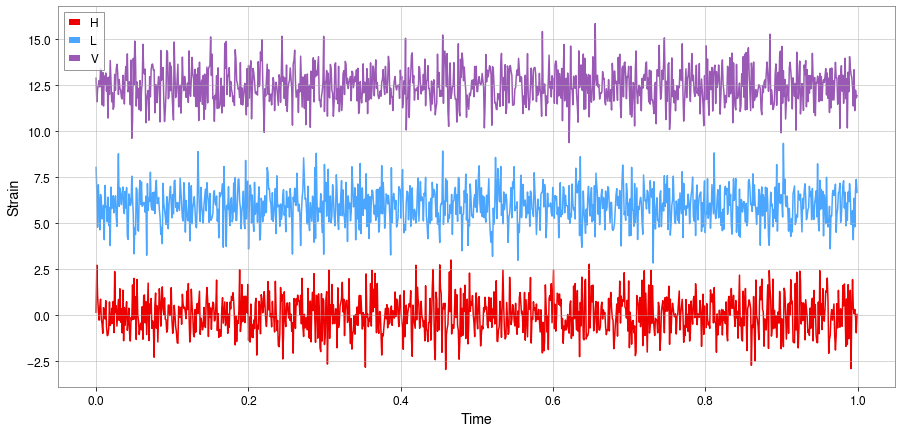

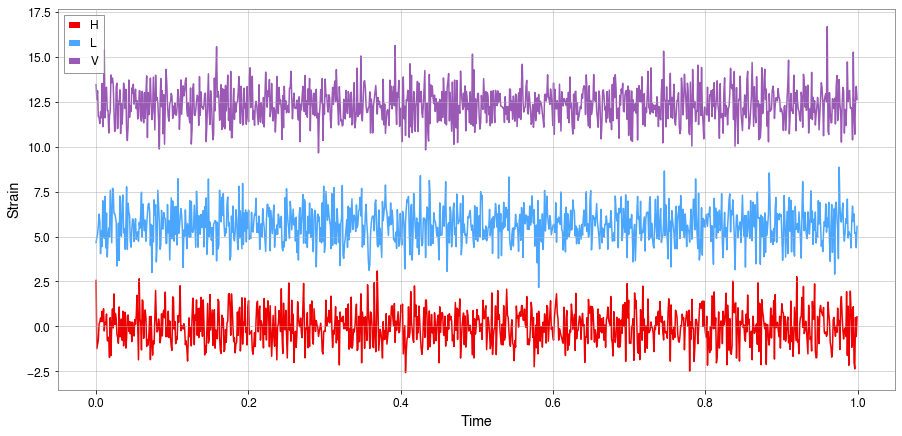

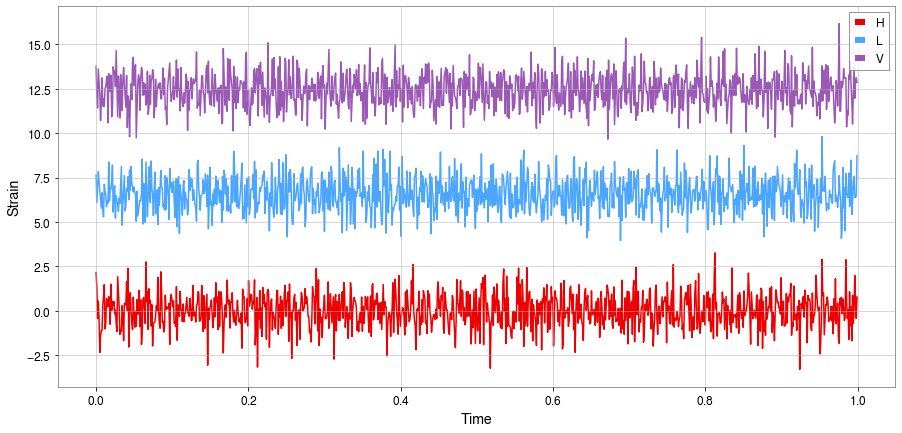

In [27]:
Set = DataSet.generator(duration=1
                       ,fs=1024
                       ,size=3
                       ,detectors = 'HLV'
                       ,labels={'type':'noise'}
                       ,backgroundType ='optimal')

for pod in Set: pod.plot()

Some extra options: 
    
- _windowSize_ `int`
    
    This is the window around the main duration of the instantiation that we will use for the estimation of PSD for the whitening.
    
- _plugins_ `PlugIn/str`

   You can add plugins in the generation. There are 3 plugins that are already defined and you can call them by string (psd, snr ,correlation)

[]
[(3, 1024)[ -0.812 -1.078 ... 0.9208 -0.351 ] H 
         [ -0.005 -2.537 ... 0.1752 -1.172 ] L 
         [ -0.462 -1.364 ... -1.078 0.0033 ] V  LABELS: noise  
]
[(3, 1024)[ -0.812 -1.078 ... 0.9208 -0.351 ] H 
         [ -0.005 -2.537 ... 0.1752 -1.172 ] L 
         [ -0.462 -1.364 ... -1.078 0.0033 ] V  LABELS: noise  
, (3, 1024)[ -0.591 0.4987 ... 0.8086 -0.119 ] H 
         [ 1.5856 0.3640 ... -1.853 0.4150 ] L 
         [ 1.0721 -0.382 ... -0.555 0.4095 ] V  LABELS: noise  
]




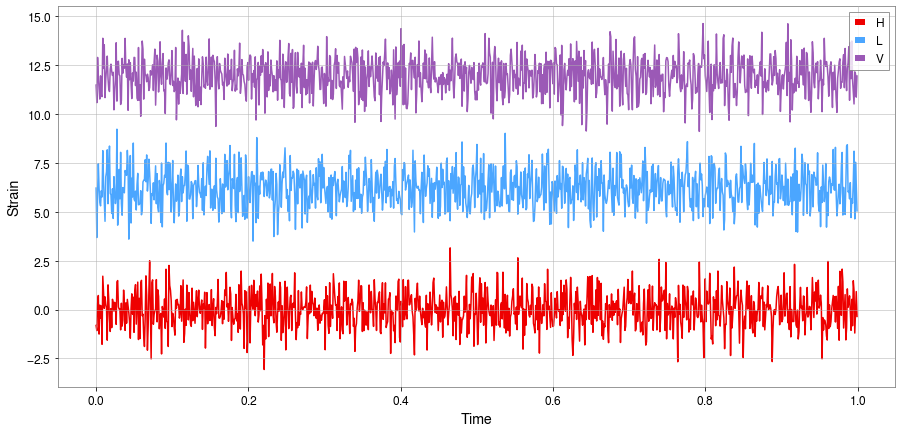

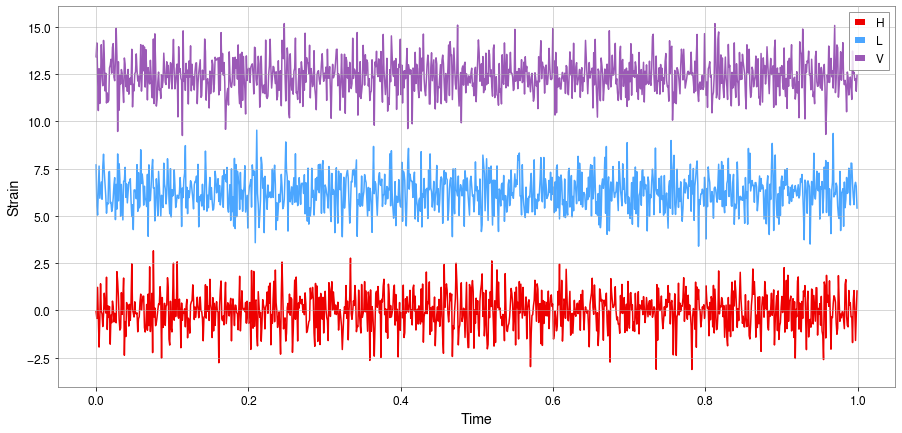

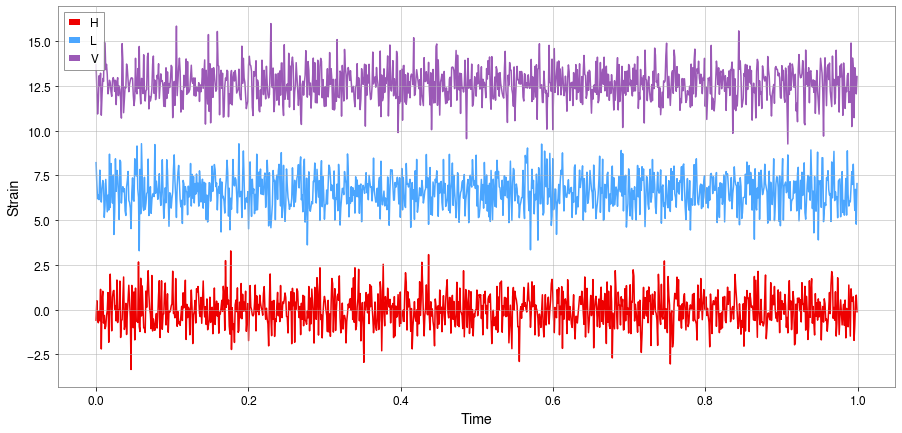

In [28]:
Set = DataSet.generator(duration=1
                       ,fs=1024
                       ,size=3
                       ,detectors = 'HLV'
                       ,labels={'type':'noise'}
                       ,backgroundType ='optimal'
                        
                       # More options
                       ,windowSize = 16
                       ,plugins= ['psd','correlation'])


#Set.addPlugIn(knownPlugIns('correlation',window=20))
for pod in Set: pod.plot()

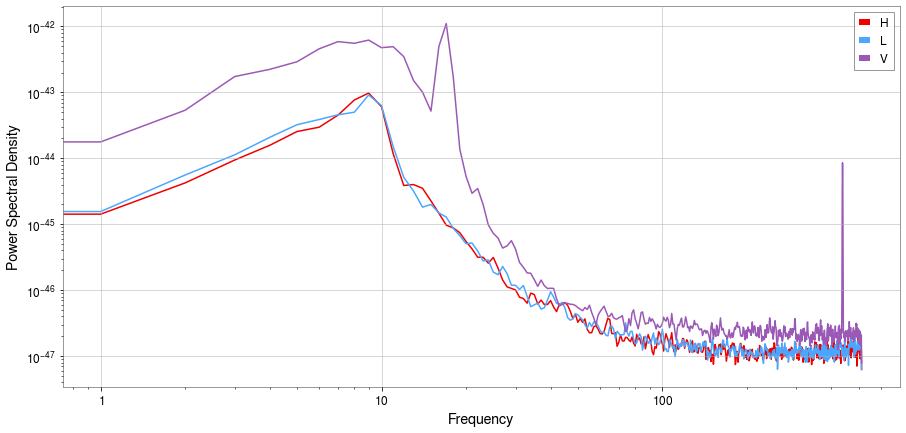

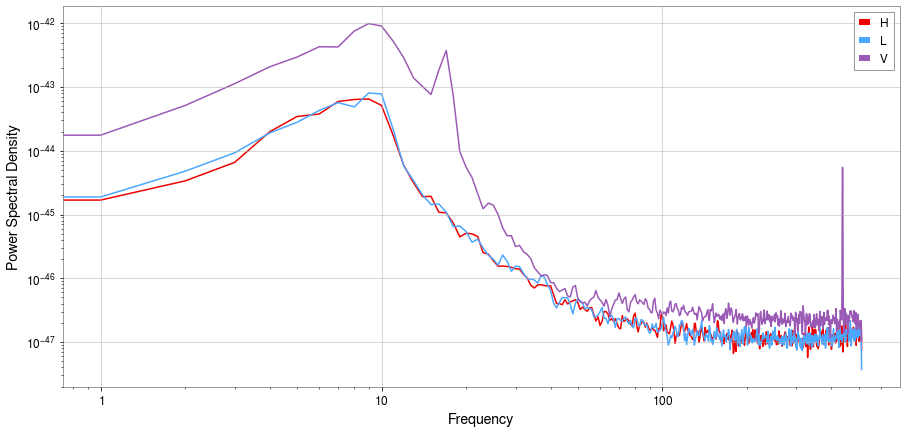

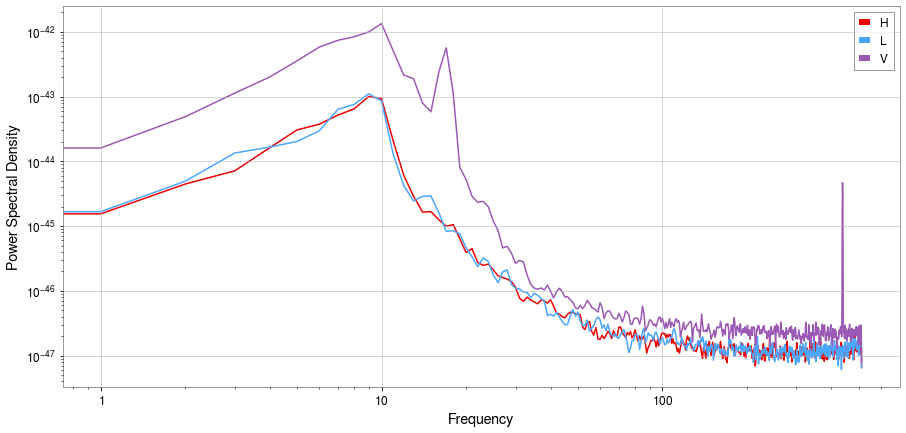

In [29]:
for pod in Set: pod.plot('psd')

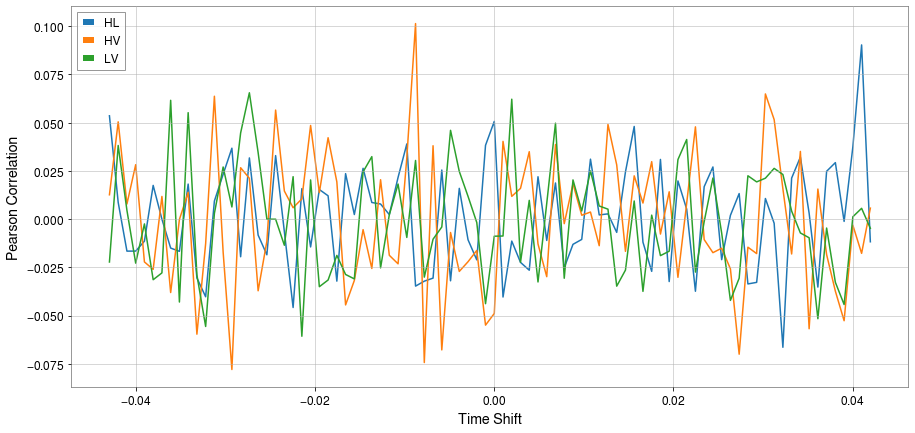

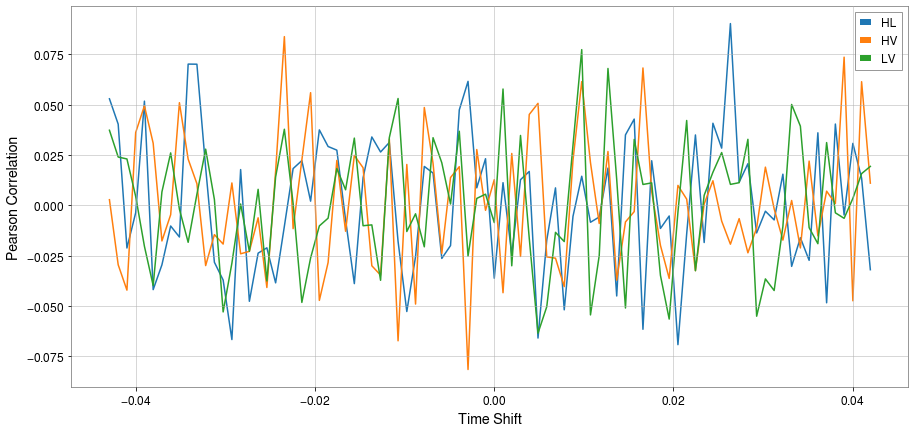

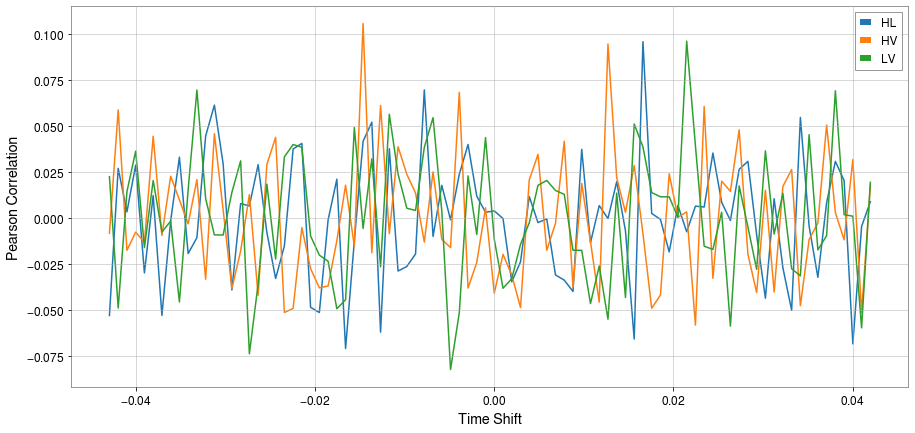

In [30]:
for pod in Set: pod.plot('correlation')

# Noise and Injection generator

When an injection is needed we need to provide a file with the waveforms to be injected. Those injections have to be projected already to the detectors desired. This generator assumes that there is the following structuri in the file:
* fileWithInjections
   * H
   * L
   * V
   
Additionally you have to provide an injectionSNR. Try different SNR values to see how the signal changes.

[]
[(3, 1024)[ -1.744 0.1120 ... -2.838 1.6669 ] H 
         [ -2.238 0.2387 ... -0.092 0.9880 ] L 
         [ 1.3612 -0.689 ... 1.0851 -0.506 ] V  LABELS: signal  
]
[(3, 1024)[ -1.744 0.1120 ... -2.838 1.6669 ] H 
         [ -2.238 0.2387 ... -0.092 0.9880 ] L 
         [ 1.3612 -0.689 ... 1.0851 -0.506 ] V  LABELS: signal  
, (3, 1024)[ 1.3719 -0.177 ... 0.3356 0.7117 ] H 
         [ -0.289 0.8760 ... -0.898 1.0516 ] L 
         [ 0.8596 0.4364 ... -0.238 0.9841 ] V  LABELS: signal  
]
[(3, 1024)[ -1.744 0.1120 ... -2.838 1.6669 ] H 
         [ -2.238 0.2387 ... -0.092 0.9880 ] L 
         [ 1.3612 -0.689 ... 1.0851 -0.506 ] V  LABELS: signal  
, (3, 1024)[ 1.3719 -0.177 ... 0.3356 0.7117 ] H 
         [ -0.289 0.8760 ... -0.898 1.0516 ] L 
         [ 0.8596 0.4364 ... -0.238 0.9841 ] V  LABELS: signal  
, (3, 1024)[ -0.071 -0.562 ... 1.6879 1.5383 ] H 
         [ 1.4420 -1.212 ... -0.363 -0.227 ] L 
         [ 0.6494 0.5656 ... -0.625 1.4487 ] V  LABELS: signal  
]
[(3, 1024)[ -1.7

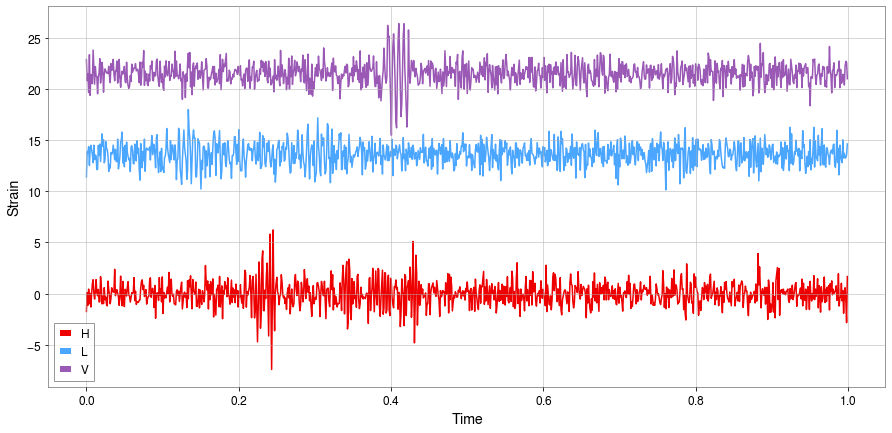

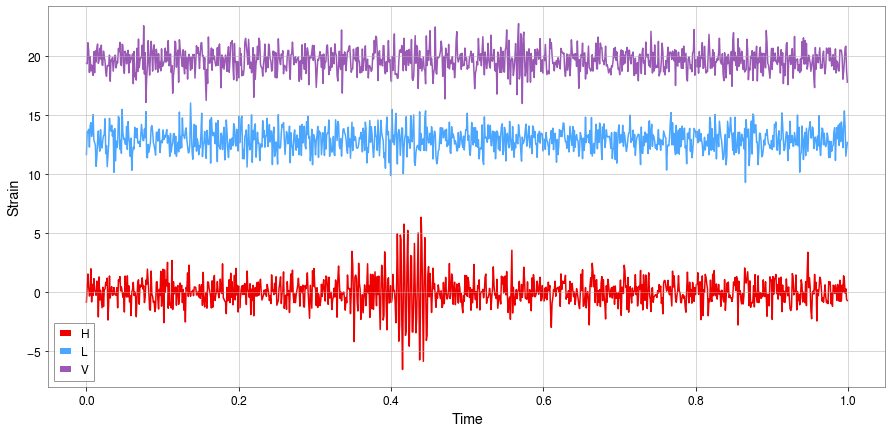

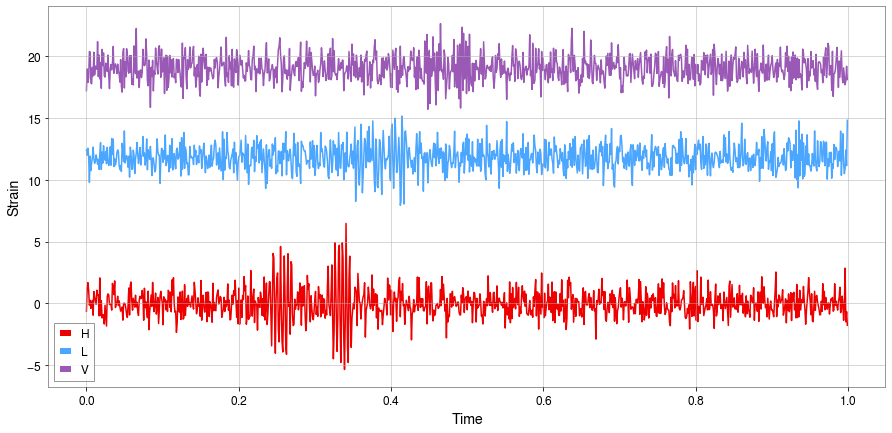

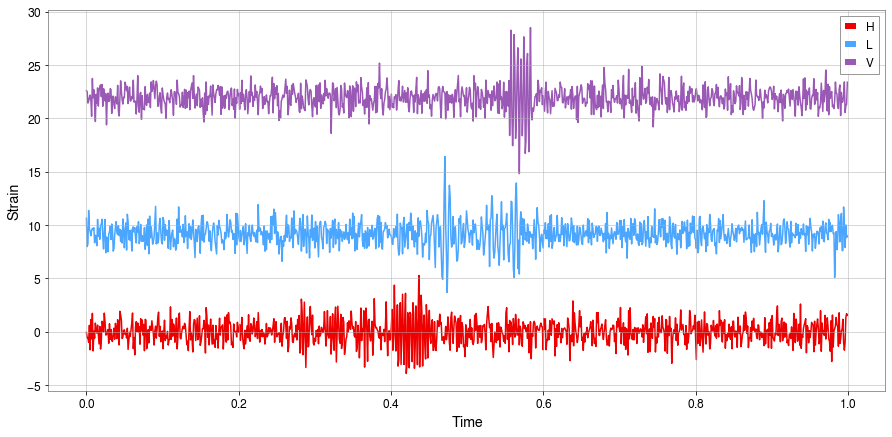

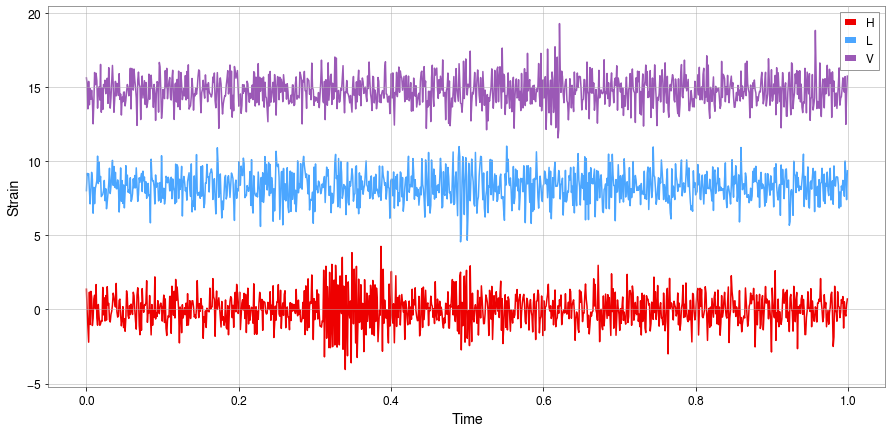

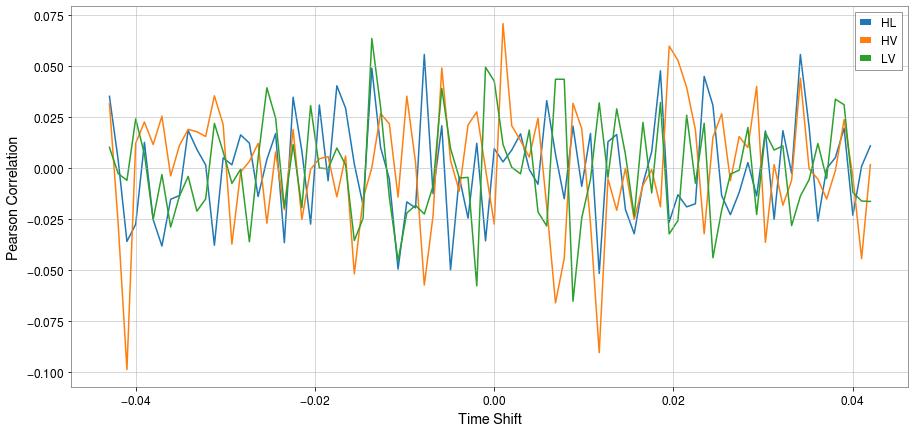

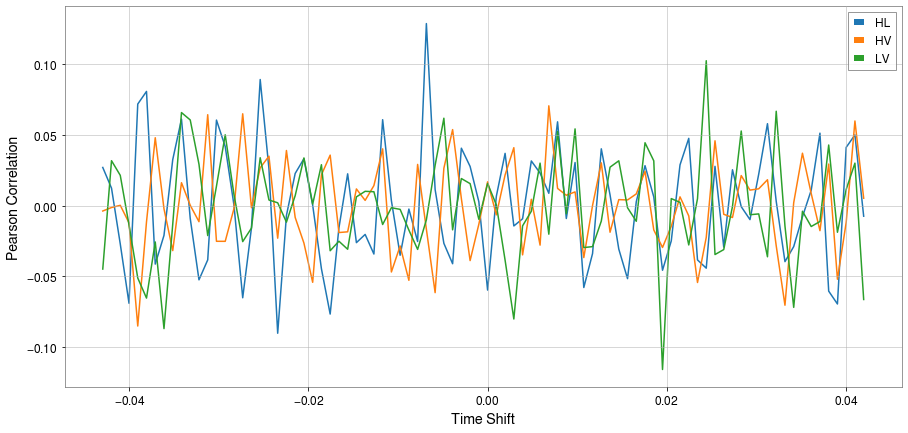

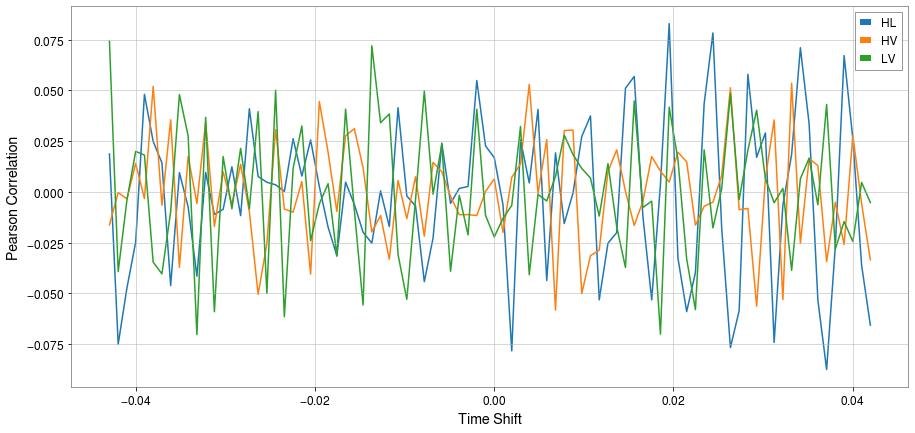

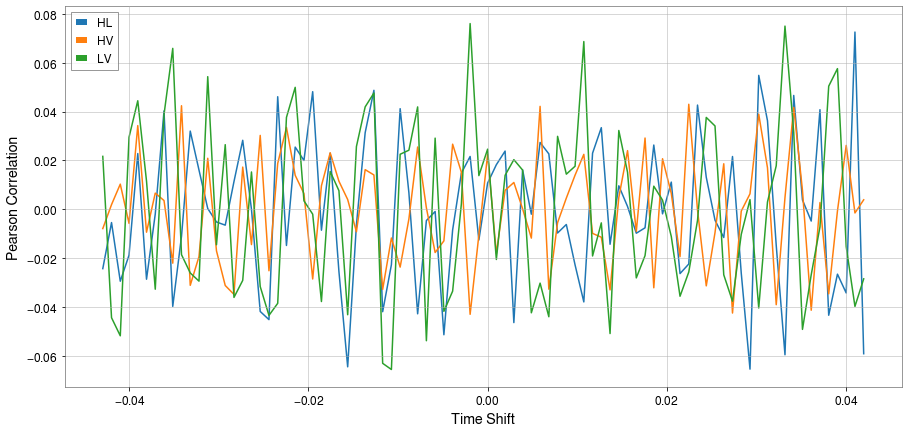

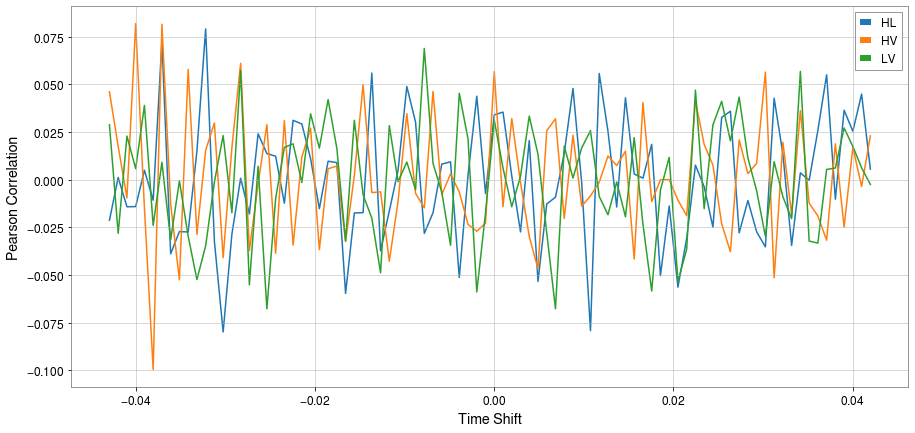

In [38]:

fileWithInjections = '/home/vasileios.skliris/injections/wnb_03_test_pod'

Set = DataSet.generator(duration=1
                       ,fs=1024
                       ,size=5
                       ,labels = {'type' : 'signal'}
                       ,detectors = 'HLV'
                       ,backgroundType ='optimal'
                       #Inection related 
                       ,injectionFolder = fileWithInjections
                       ,injectionSNR = 50
                       #,injectionHRSS=5e-25
                    
                       # More Options
                       #,single=True
                       ,differentSignals=True
                       ,maxDuration=0.4
                       ,disposition=0.2
                       ,windowSize = 16
                       ,plugins= ['snr','psd','correlation'])
        
    
                       #,ignoreDetector='V')
    
for pod in Set: pod.plot()
for pod in Set: pod.plot('correlation')
#for pod in Set: print(pod.hrss)
# for pod in Set: 
#     print(pod.snrH,pod.snrL,pod.snrV,np.sqrt(pod.snrH**2+pod.snrL**2+pod.snrV**2))

- Finally we have some parameters in the generator to create dataset that try to confuse the algorithm.
  
  - _single_: `bool`
      
      When true the signal is injected to only one randomly selected detector. This is used to simulate glitches.
      
  - _differentSignals: `bool`
  
      When true the generator injects different signals to each detector. This makes coinsident signals that are not coherent, challenging the network.
      
  - _disposition_ `int (<duration)`
  
      This is an artificial timeshift between injections to simulate different time delays of the real signals to confuse the network even more.

Attempt to change the parameters above to see how the generation of code changes.

In [ ]:
import pathlib